Random Forest Model:
RMSE: 0.0304913981884974
MAE: 0.0005815831987075939
R-squared: 0.9999185647302324
Cross-validation R-squared: 0.9994943924632714

Decision Tree Model:
RMSE: 0.01640888420591555
MAE: 0.00026925148088314486
R-squared: 0.9999764160817355
Cross-validation R-squared: 0.999668710067812


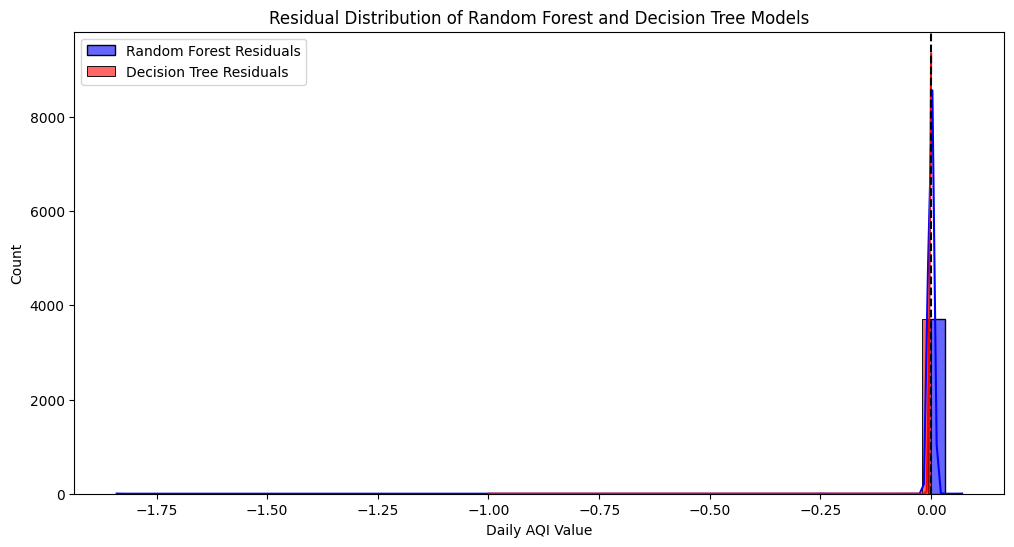


Feature Importances:
                             Feature  Importance
0  Daily Max 8-hour CO Concentration    0.999907
3                      Site Latitude    0.000054
4                     Site Longitude    0.000039
1                    Daily Obs Count    0.000000
2                   Percent Complete    0.000000


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "ad_viz_plotval_data (1).csv"
df = pd.read_csv(file_path)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Selecting relevant features
df_extended = df[['Daily Max 8-hour CO Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'Site Latitude', 'Site Longitude']]

df_extended = df_extended.dropna()

# Splitting the data into features (X) and target (y)
X = df_extended[['Daily Max 8-hour CO Concentration', 'Daily Obs Count', 'Percent Complete', 'Site Latitude', 'Site Longitude']]
y = df_extended['Daily AQI Value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)

# Train models
rf_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

# Predictions
rf_preds = rf_model.predict(X_test_scaled)
dt_preds = dt_model.predict(X_test_scaled)

# Model Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
rf_r2 = r2_score(y_test, rf_preds)
dt_r2 = r2_score(y_test, dt_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)

# Cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Feature Importance Analysis
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Print Evaluation Metrics
print("Random Forest Model:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R-squared: {rf_r2}")
print(f"Cross-validation R-squared: {np.mean(rf_cv_scores)}")

print("\nDecision Tree Model:")
print(f"RMSE: {dt_rmse}")
print(f"MAE: {dt_mae}")
print(f"R-squared: {dt_r2}")
print(f"Cross-validation R-squared: {np.mean(dt_cv_scores)}")

# Visualizing residuals
rf_residuals = y_test - rf_preds
dt_residuals = y_test - dt_preds

plt.figure(figsize=(12, 6))
sns.histplot(rf_residuals, bins=50, kde=True, color='blue', label='Random Forest Residuals', alpha=0.6)
sns.histplot(dt_residuals, bins=50, kde=True, color='red', label='Decision Tree Residuals', alpha=0.6)
plt.axvline(0, color='black', linestyle='--')
plt.title("Residual Distribution of Random Forest and Decision Tree Models")
plt.legend()
plt.show()

# Print Feature Importance
print("\nFeature Importances:")
print(feature_importances)
